# CA1 Part A: Classification

![mushrooms](.\assets\img\mushrooms_bg.jpg)

|  |  |
| --- | --- |
| Name | Tan Yu Hoe |
| Admission Number | P2026309 |
| Class | DAAA/FT/2A/04 |

**Background**

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).

Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.

This latter class was combined with the poisonous one.  
The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like \`\`leaflets three, let it be'' for Poisonous Oak and Ivy.

**Task**

1. Write the code to solve the prediction task.
2. **In the Jupyter notebook**, write your report detailing your implementation your experiments and analysis.

<a class="anchor" id="0"></a>

## Table of Contents

- [Installing and Importing Libraries](#1)
- [The Prediction Task](#2)
- [Exploratory Data Analysis](#3)
- [Feature Engineering](#4)
- [Model Selection](#5)
- [Hyperparameter Tuning and Evaluation](#6)

Note: this function does not work in Visual Studio Code

---

[](..\..\..\..\..)
## Getting started
For the first step, I will be import some relevant libraries which might be useful for me to handle the data and create some visualisations. Furthermore, I will import pandas profiling to do a rough profiling and sklearn for machine learning.
\## Data Maipulation
- **numpy**: support for multi dimensional arrays
- **pandas**: data manipulation tool
\## Exploratory Data Analysis
- **pandas\_profling**: quick EDA report generator
\## Data Visualisation
- **matplotlib**: baseline plotting library
- **seaborn**: high-level plotting library based on matplotlib
[Navigate to Tables of Content](#0)

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Misc
import os
from warnings import filterwarnings
import statsmodels.api as sm
import scipy.stats as ss
import itertools
from collections import Counter
import math

In [2]:
# Updating on local environtment (Google Colab is outdated)
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
# Installing on local environment (Google Colab does not have this library)
!pip install -U yellowbrick
# EDA Report
from pandas_profiling import ProfileReport

Requirement already up-to-date: pandas-profiling[notebook] in d:\anaconda3_v2\lib\site-packages (3.0.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Requirement already up-to-date: yellowbrick in d:\anaconda3_v2\lib\site-packages (1.3.post1)


In [3]:
## Import all functions and methods

# Pipeline
from sklearn.pipeline import Pipeline
# Model_Selection
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    cross_val_predict,
    cross_validate
)
# Classification Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    roc_auc_score,
    classification_report,
    plot_roc_curve,
    make_scorer
)
# Model Evaluation Visualisations
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve,
    FeatureImportances,
    ValidationCurve
)
from sklearn.tree import plot_tree
# Classification Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

<a class="anchor" id="2"></a>

## The Prediction Task

**How is the prediction task defined?**

Our prediction task is to create a machine learning model to predict a mushroom edibility, edible or poisonous, based on the mushrooms features.

**What is the meaning of the output variable?**

The output variable is a two class label - edible or poisonous. Edible (e) is defined the mushroom would cause no hard when consumed; whereas poisonous (p) refers to the mushroom will cause harmful effects when eaten.

**The data**

The class is followed by 22 varying characteristics of the mushroom.

- Number of Instances: 8124
- Number of Attributes: 22 (all nominally valued - according to the metadata)
- Missing Attributes: denoted by "?"
- Class Distribution: 
    - edible: 4208 (51.8%)
    - poisonous: 3916 (48.2%)
    - total: 8124 instances

[Navigate to Tables of Contents](#0)

In [4]:
# Columns Names as the header is not included in the dataset
col_name = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Reading .csv file, the metadata states that missing data are labelled as '?'
mushrooms = pd.read_csv('./assets/mushroom/agaricus-lepiota_data.csv', names=col_name, na_values='?')
mushrooms['class'] = mushrooms['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
display(mushrooms)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     poisonous         x           s         n       t    p               f   
1        edible         x           s         y       t    a               f   
2        edible         b           s         w       t    l               f   
3     poisonous         x           y         w       t    p               f   
4        edible         x           s         g       f    n               f   
...         ...       ...         ...       ...     ...  ...             ...   
8119     edible         k           s         n       f    n               a   
8120     edible         x           s         n       f    n               a   
8121     edible         f           s         n       f    n               a   
8122  poisonous         k           y         n       f    y               f   
8123     edible         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

---

<a class="anchor" id="3"></a>
## Exploratory Data Analysis

> <i>"If you torture the data long enougb, it will confess to anything"</i> ~ Ronald Coarse

Why do we conduct EDA (Exploratory Data Analysis)? It helps to grasp a better understanding of our dataset by summarising their features/characteristics. Usually, EDA revolves around creating data visualisation and conducting statistical tests.

[Navigate to Tables of Contents](#0)

### 1. Data Structure

Questions to Answer:
- How many features is in the dataset?
- How many observation is in the dataset?
- What is the data type of each feature?
- Are there missing/null values in the dataset?

In [5]:
# retrieve number of missing data type, shape, and data-type
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Observation**
- 8124 rows, 23 columns
- every columns are `objects` -> Categorical Data
- only column 'stalk-root' contains missing data

In [6]:
# display descriptive statistics
mushrooms.describe().T

count unique     top  freq
class                     8124      2  edible  4208
cap-shape                 8124      6       x  3656
cap-surface               8124      4       y  3244
cap-color                 8124     10       n  2284
bruises                   8124      2       f  4748
odor                      8124      9       n  3528
gill-attachment           8124      2       f  7914
gill-spacing              8124      2       c  6812
gill-size                 8124      2       b  5612
gill-color                8124     12       b  1728
stalk-shape               8124      2       t  4608
stalk-root                5644      4       b  3776
stalk-surface-above-ring  8124      4       s  5176
stalk-surface-below-ring  8124      4       s  4936
stalk-color-above-ring    8124      9       w  4464
stalk-color-below-ring    8124      9       w  4384
veil-type                 8124      1       p  8124
veil-color                8124      4       w  7924
ring-number               8124      3       o  7488
ring-type                 8124      5       p  3968
spore-print-color         8124      9       w  2388
population                8124      6       v  4040
habitat                   8124      7       d  3148

**Observations:**

- some columns have large number of classes (\> 6), gotta check for association

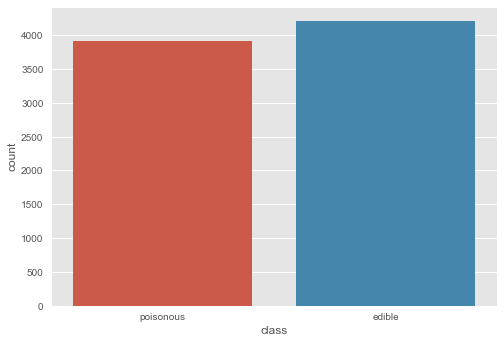

In [7]:
with plt.style.context('ggplot'):
    sns.countplot(x=mushrooms['class'])
    plt.show()

### 2. Data Profiling

In order to get some awareness in the dataset, I will be using `pandas_profiling` library to do a profile on the dataset to check for any issues.

p.s. for better viewability, I have exported the profile to a `.html` file under `/assets`, it would be advised to view in browser instead of the notebook.

In [8]:
# Create and Display the report
profile = ProfileReport(mushrooms, orange_mode=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


In [9]:
# export profile to .html
os.makedirs('./assets/profile', exist_ok=True)
profile.to_file('./assets/profile/mushroom_profile.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.57it/s]


**Observation**

- most/all of the columns contains categorical data
    - encode the data during preprocessing
- 'veil-type' contains only one type of value 'p' -> zero variance
    - dropping constant feature as it does not describe the mushroom properly
- 'stalk-root' has 30.5% missing data
    - impute or drop column, since there are more than 30% of the data missing

### 3A. Cramér's V - Multicollinearity Feature Selection

First part, I want to check for Features with Multicollinearity, which in this scneario, when two categorical features have very high association with each other. Why Multicollinearity is bad? The problem is that collinear features can undermine the significance during modelling, which reduces the coefficient in the learning algorithm.

I will be using Cramér's V to measure the association between two nominal variable. Short background about this statistical test is that is based on Chi-Square testing, but more suited for nominal data where there is no order.

Formula: $$ V = \sqrt{\frac{\phi^2}{min(k - 1, r - 1)}} $$ where $\phi$ is derived from Chi-Square Testing.

Reference:

- [https://www.kaggle.com/phaethonprime/eda-and-logistic-regression](https://www.kaggle.com/phaethonprime/eda-and-logistic-regression)

In [10]:
 filterwarnings('ignore')
# function to calculate statistics
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = list(mushrooms.drop(['class'], axis=1).columns)
corrM = np.zeros((len(cols),len(cols)))
# calculating association level
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(mushrooms[col1], mushrooms[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
print("Finish Calculating Cramér's V")

Finish Calculating Cramér's V


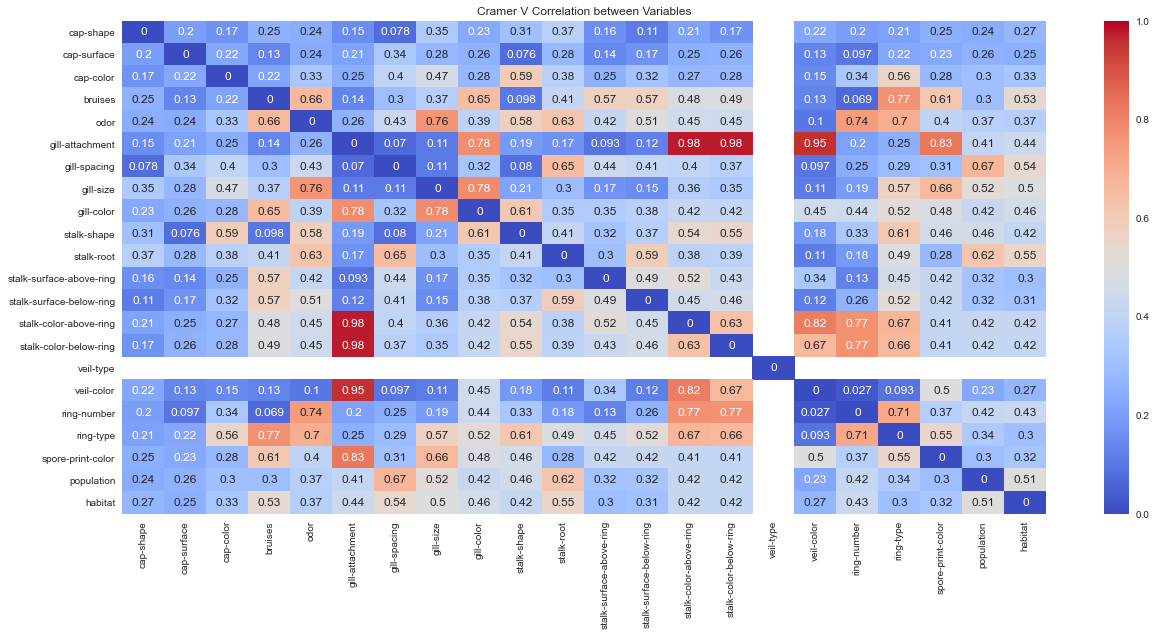

In [11]:
# generating plot
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(18, 9), tight_layout=True)
ax = sns.heatmap(corr, annot=True, ax=ax, vmin=0, vmax=1, cmap='coolwarm')
ax.set_title("Cramer V Correlation between Variables")
plt.show()

In [12]:
# getting features with high multicollinearity
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .9 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlation':Multicollinear_Corr, 'Features': Multicollinear_Features})
display(MC_df)

Correlation                                   Features
0     0.977312  [gill-attachment, stalk-color-above-ring]
1     0.977312  [gill-attachment, stalk-color-below-ring]
2     0.954963              [gill-attachment, veil-color]
3     0.977312  [stalk-color-above-ring, gill-attachment]
4     0.977312  [stalk-color-below-ring, gill-attachment]
5     0.954963              [veil-color, gill-attachment]

**Observations**

- we can see that `gill-attachment` has high correlation with multiple feature
    - ('stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color')

I will have to drop gill-attachment as it might undermine the significance of the other features.

### 3B. Uncertaintity coefficient (Theil's U) - Univariate Feature Selection


The issue with Cramér's V is that it does not take into asssumption whether the variable is X or y, as such I would have to take another approach to measure correlation with `class`. I will be using `Uncertaintity coefficient`, also known as `Theil's U` to measure for nominal association with `class`. We would want to investigate if certain features has more association to the mushroom's `class`.

What is Uncertaintity Coefficient?

Uncertaintity Coefficient / proficiency / entropy coefficient / Theil's U is a statistical test, similar to Chi Square and Cremer's V, to measure association between nominal data.

Formula: $$U(X|Y) = \frac {H(X) - H(X|Y)} {H(X)} = \frac {I(X;Y)} {H(X)}$$

![Venn Diagram](./assets/img/venn.png)

`Theil's U` provides a coefficient range between 0 to 1, where 0 means lack of association to `class`, and 1 has more association to `class`. (Zychlinski, 2019)

Reference:

- Zychlinski, S. (2019, December 26). The Search for Categorical Correlation. Medium. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9. 


In [13]:
# calculating conditional entropy
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

# calculates U statistics
def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

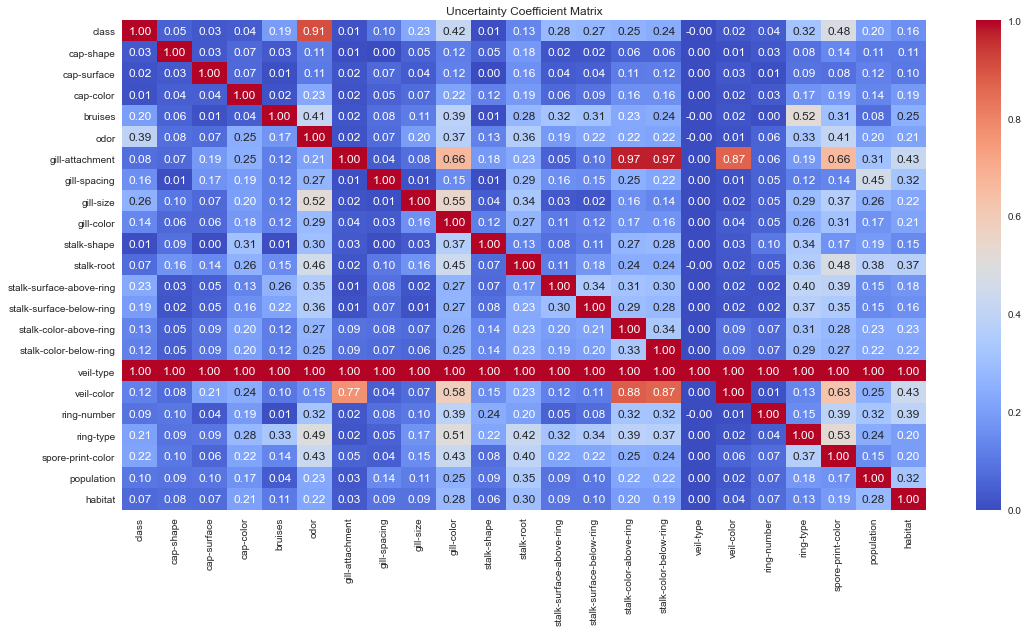

In [14]:
# creating a dataframe placeholder
theilu = pd.DataFrame(index=mushrooms.columns, columns=mushrooms.columns)
for y in theilu.index:
    for x in theilu.columns:
        theilu.loc[x, y] = theil_u(mushrooms[x].to_list(), mushrooms[y].to_list())
theilu.fillna(value=np.nan, inplace=True)
# plotting out correlation matrix
fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(theilu, annot=True, fmt='.2f', vmin=0, vmax=1, cmap='coolwarm', ax=ax)
ax.set_title("Uncertainty Coefficient Matrix")
plt.show()

Here we can see the attributes in the x and y axis plotted out as a heatmap.

How should we read this?

The values in the heatmap represents how much of y can be explained by x. Since we are looking for association with `class`, I will subset the heatmap to only `class`

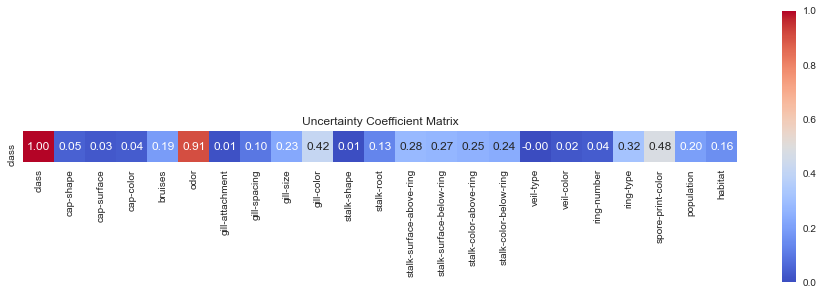

In [15]:
# plotting out correlation map
fig, ax = plt.subplots(figsize=(16, 5))
theilu_class = theilu.loc[['class']]
sns.heatmap(theilu_class, annot=True, fmt='.2f', vmin=0, vmax=1, cmap='coolwarm', ax=ax, square=True)
ax.set_title("Uncertainty Coefficient Matrix")
plt.show()

We can see that `odor` has very high association with `class`. Furthermore, there are some attributes highlighted in dark blue to have very low association with `class`.

In [16]:
# subsetting columns which are less than 0.05
theilu_class[theilu_class < 0.05].dropna(axis=1).columns.tolist()

['cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'stalk-shape',
 'veil-type',
 'veil-color',
 'ring-number']

** Observation **

- 'cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'stalk-shape', 'veil-type', 'veil-color', 'ring-number' has low association with `class`
- `odor` has very high association with `class`, $U = 0.91$
- 'gill-attachment' is also selected out from Cramer's V, so I have to drop it.

### 4\. Dropping Redundant Columns

Things to be done here:

- dropping features with high collinearlity with other features (`gill-attachment`)
- dropping columns with low association with `class` as they probably are not good features for model selection

In [17]:
# Getting columns name where U-statistics is smaller than 0.05
drop_col = theilu_class[theilu_class < 0.05].dropna(axis=1).columns.tolist()
theilu_class[theilu_class < 0.05].dropna(axis=1)

cap-shape  cap-surface  cap-color  gill-attachment  stalk-shape  \
class   0.048842     0.028617   0.036083         0.014178     0.007524   

          veil-type  veil-color  ring-number  
class -1.603208e-16    0.023839     0.038489

In [18]:
# creating dataframe fillna() and drop columns
df = mushrooms.drop(drop_col, axis=1)
df.columns.to_list()

['class',
 'bruises',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

### How do you represent your data as features?

After exploring and conducting tests on the data, I deem these columns to be suitable to be used as features for model selection.

 'bruises',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat'

 Below shows an overview of the features.

In [19]:
df.drop('class', axis=1).head()

bruises odor gill-spacing gill-size gill-color stalk-root  \
0       t    p            c         n          k          e   
1       t    a            c         b          k          c   
2       t    l            c         b          n          c   
3       t    p            c         n          n          e   
4       f    n            w         b          k          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring ring-type spore-print-color population habitat  
0                      w         p                 k          s       u  
1                      w         p                 n          n       g  
2                      w         p                 n          n       m  
3                      w         p                 k          s       u  
4                      w         e                 n          a       g

---

<a class="anchor" id="4"></a>

## Feature Engineering / Preprocessing

> extracting features from their domain; in summary, preparing the data before modelling

### Did you process the features in any way?

I will be first partitioning the data into training (70%) and testing set (30%). You may ask why 7:3 ratio, the reason being this dataset is particularly small (8124 observations), I think it is necessary to have more data allocated to the testing set to evaluate the model better.

Futhermore, since all of the features is categorical-nominal data, I will be using One-Hot Encoding throughout all of the features.

Since there are no quantitative features, no scaling (Z-Score Standardisation or MinMax Normalisation) is required.

**List of Techniques used for this dataset**

1. Data Partition
2. Imputation
3. Categorical Encoding

[Navigate to Tables of Contents](#0)

In [20]:
# train_test_split
from sklearn.model_selection import train_test_split
# Encoder
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder
)
# Column Transformer
from sklearn.compose import ColumnTransformer

In [21]:
# defining features, X, and target variable, y
X = df.drop(columns='class')
y = df['class']
print(X.shape, y.shape)

(8124, 14) (8124,)


### 1. Data Partition

I will be doing Data Partitioning, aka train_test_split, first to prevent any data leakage to the testing set in the further steps. As mentioned above, I will be spltting the data to 7:3 ratio.

In [22]:
# using sklearn method to split the data into training (.7) and testing (.3) set
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y, test_size=.3)
print(X_train.shape, y_train_p.shape)
print(X_test.shape, y_test_p.shape)

(5686, 14) (5686,)
(2438, 14) (2438,)


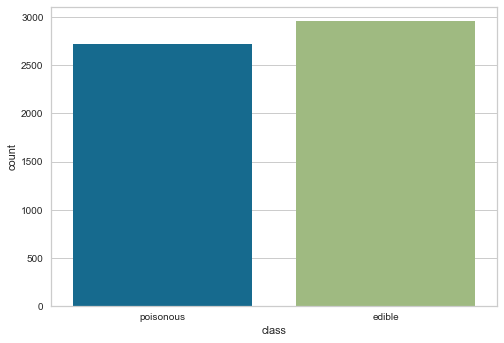

In [23]:
# checking the distribution of classes in the target variable
sns.countplot(x=y_train_p)
plt.show()
# As we can see, the classes 'p' and 'e' are quite close to each other in terms of frequency. I don't think any class balancing is needed.

### 2\. Imputation

I will be using `SimpleImputer` from `sklearn.impute` to impute missing values with the mode value.

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns).isna().sum()

bruises                     0
odor                        0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 3\. Categorical Encoding

I will be using the `OneHotEncoder` and `LabelEncoding` method from `sklearn.preprocessing`. Why not pd.get\_dummies() and make my life easier, you may ask? In my opinion, I think using sklearn version will be easier to integrate into a data pipeline later on.

Why One Hot Encoding?

The metadata states that all variables are nominally valued, as such we have to assume all variables to be nominal data. Since there is no order, I have to use sklearn.preprocessing.OneHotEncoder method to encode the data.

In [25]:
# Initiate OneHotEncoder
onehot = OneHotEncoder(drop='first', sparse=False)
# Fitting to Training Data and Apply Transfomation
onehot.fit(X_train)
# Getting Feature names
X_feature_name = onehot.get_feature_names(X_train.columns)
# Applying Transformation on training and testing sets
X_train_encode = pd.DataFrame(onehot.transform(X_train), columns=X_feature_name)
X_test_encode = pd.DataFrame(onehot.transform(X_test), columns=X_feature_name)
display(X_test_encode)

bruises_t  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  \
0           0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
1           1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2           1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
4           0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
2433        1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2434        1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2435        1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2436        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
2437        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   

      odor_y  gill-spacing_w  ...  population_n  population_s  population_v  \
0        0.0             1.0  ...           0.0           0.0           0.0   
1        0.0             0.0  ...           0.0           0.0           1.0   
2        0.0             0.0  ...           0.0           0.0           0.0   
3        0.0             0.0  ...           0.0           0.0           1.0   
4        0.0             0.0  ...           0.0           0.0           0.0   
...      ...             ...  ...           ...           ...           ...   
2433     0.0             0.0  ...           0.0           0.0           1.0   
2434     0.0             0.0  ...           0.0           0.0           1.0   
2435     0.0             0.0  ...           0.0           0.0           0.0   
2436     0.0             0.0  ...           0.0           0.0           1.0   
2437     0.0             1.0  ...           0.0           0.0           0.0   

      population_y  habitat_g  habitat_l  habitat_m  habitat_p  habitat_u  \
0              0.0        0.0        1.0        0.0        0.0        0.0   
1              0.0        0.0        0.0        0.0        0.0        0.0   
2              1.0        0.0        0.0        0.0        0.0        0.0   
3              0.0        0.0        0.0        0.0        0.0        0.0   
4              1.0        0.0        0.0        0.0        1.0        0.0   
...            ...        ...        ...        ...        ...        ...   
2433           0.0        0.0        0.0        0.0        0.0        0.0   
2434           0.0        0.0        0.0        0.0        0.0        0.0   
2435           0.0        0.0        0.0        0.0        0.0        0.0   
2436           0.0        0.0        1.0        0.0        0.0        0.0   
2437           0.0        1.0        0.0        0.0        0.0        0.0   

      habitat_w  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
2433        0.0  
2434        0.0  
2435        1.0  
2436        0.0  
2437        0.0  

[2438 rows x 71 columns]

In [26]:
# Initiate label encoder
label_encoder = LabelEncoder()
# Fitting to Training Data and Apply Transfomation
y_train = label_encoder.fit_transform(y_train_p)
y_test = label_encoder.transform(y_test_p)
label_encoder.classes_

array(['edible', 'poisonous'], dtype=object)

---

<a class="anchor" id="5"></a>

## Model Selection

Finally the fun part, model selection. They say an average data scientist spends 60% of their time cleaning and orgnanising the data, I am glad that part is over Lol.

My plan for model selection is to run the data through some models and deem the best model based on metrics and explainability.

[Navigate back to Table of Contents](#0)

In [27]:
# preset scoring options
scoring_methods = ['accuracy', 'balanced_accuracy', 'f1', 'roc_auc']
# Initate Classifiers with default hyperparameters
models = [
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('Perceptron', Perceptron()),
    ('Linear SVC', SVC(kernel='linear')),
    ('Polynomial SVC', SVC(kernel='poly')),
    ('RBF SVC', SVC(kernel='rbf')),
    ('Sigmoid SVC', SVC(kernel='sigmoid')),
    ('ExtraTreesClassifier', ExtraTreesClassifier()),
    ('GaussianNB', GaussianNB()),
    ('MLPClassifier', MLPClassifier()),
    ('RidgeClassifier', RidgeClassifier()),
    ('RidgeClassifierCV', RidgeClassifierCV()),
    ('CalibAratedClassifierCV', CalibratedClassifierCV()),
    ('SGDClassifier', SGDClassifier())
]

### Pseudo Lazy Predict

By right, I wanted to use this library called `lazypredict` where I can run through 30 models with only 3 lines of code. However, the requirement stated that I am not allowed to install additional third party machine learning libraries such as auto-sklearn. As such, I decided to implement my own version of Lazy Predict.

Reference: https://lazypredict.readthedocs.io/en/latest/readme.html

I will be using `Mean Cross-Validation Score` as the main metric for me to select the model. To ensure a fair test, I will be setting random seed to 0 and exclude any other hyperparameters. 

In [28]:
def select_model(X_train, y_train, models, scoring):
    # placeholder
    out = []
    # iterate through models
    for name, model in models:
        # creating temporary pipeline
        temp_pipeline = Pipeline(
            steps = [
                ('SimpleImputer', imp),
                ('OneHotEncoder', onehot),
                (name, model)
            ]
        )
        # cross validate
        score = cross_validate(temp_pipeline, X_train, y_train, scoring=scoring, n_jobs=3, verbose=1, cv=10, return_train_score=True)
        # get the average score and then store in a Series
        out.append(pd.Series(score, name=name).apply(np.mean))
    return(pd.DataFrame(out).sort_values(by=['test_accuracy', 'test_balanced_accuracy', 'test_f1', 'test_roc_auc'], ascending=False))

model_scores = select_model(X_train, y_train, models, scoring_methods)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   12.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

In [29]:
model_scores.style.apply(lambda x: ['background-color: yellow; color: black' if v else '' for v in x == x.max()]).apply(lambda x: ['background-color: orange; color: black' if v else '' for v in x == x.min()])

**Observation**

- Most models performs equally well with 100% mean cross-validation accuracy score of 5 folds, highlighted in yellow

**How did you select which learning algorithms to use?**

As almost all of the models stated above have 100% mean cross validation score. Since there is a dilemma in choosing models, I decided to go with the simplest model with the best explainability, as such DecisionTreeClassifier.

### Initiate Decision Tree Classifier with Default Hyperparameters



In [30]:
# Creating a model based on the pipeline
CART = Pipeline(
    steps=[
        ('SimpleImputer', imp),
        ('OneHotEncoder', onehot),
        ("DecisionTreeClassifier", DecisionTreeClassifier())
    ]
)
# Fitting and Predicting
CART.fit(X_train, y_train)
# Cross Validation
scores = cross_validate(CART, X_train, y_train, cv=10, scoring=scoring_methods, n_jobs=4, return_train_score=True)
# displaying scores
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name='Mean')))

fit_time  score_time  test_accuracy  train_accuracy  \
0     0.064826    0.017953            1.0             1.0   
1     0.066821    0.016956            1.0             1.0   
2     0.071808    0.023937            1.0             1.0   
3     0.068817    0.024933            1.0             1.0   
4     0.060834    0.020948            1.0             1.0   
5     0.067853    0.019917            1.0             1.0   
6     0.064828    0.018947            1.0             1.0   
7     0.074811    0.018907            1.0             1.0   
8     0.065824    0.018981            1.0             1.0   
9     0.050854    0.012982            1.0             1.0   
Mean  0.065728    0.019446            1.0             1.0   

      test_balanced_accuracy  train_balanced_accuracy  test_f1  train_f1  \
0                        1.0                      1.0      1.0       1.0   
1                        1.0                      1.0      1.0       1.0   
2                        1.0                      1.0      1.0       1.0   
3                        1.0                      1.0      1.0       1.0   
4                        1.0                      1.0      1.0       1.0   
5                        1.0                      1.0      1.0       1.0   
6                        1.0                      1.0      1.0       1.0   
7                        1.0                      1.0      1.0       1.0   
8                        1.0                      1.0      1.0       1.0   
9                        1.0                      1.0      1.0       1.0   
Mean                     1.0                      1.0      1.0       1.0   

      test_roc_auc  train_roc_auc  
0              1.0            1.0  
1              1.0            1.0  
2              1.0            1.0  
3              1.0            1.0  
4              1.0            1.0  
5              1.0            1.0  
6              1.0            1.0  
7              1.0            1.0  
8              1.0            1.0  
9              1.0            1.0  
Mean           1.0            1.0

**Observation**

- 10 fold cross validation shows that the model completely predict True predictions for every fold
- model is perfect fit

### Creating a Stupid Baseline Model

A baseline model is simple and interpretable, easy to infer upon. I am going to use DummyClassifier as a stupid baseline to benchmark against my system later on.

stratified: generates predictions by respecting the training set’s class distribution. 

In [31]:
# Creating a model based on the pipeline
stupid = Pipeline(
    steps=[
        ('SimpleImputer', imp),
        ("OneHotEncoder", onehot),
        ("model", DummyClassifier(strategy='uniform'))
    ]
)
# Fitting and Predicting
stupid.fit(X_train, y_train)
# Cross Validation
scores = cross_validate(stupid, X_train, y_train, cv=10, scoring=scoring_methods, n_jobs=4, return_train_score=True)
# displaying scores
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name='Mean'))
    .style.apply(lambda x: ['background-color: yellow; color: black' if v else '' for v in x == x.max()])
        .apply(lambda x: ['background-color: orange; color: black' if v else '' for v in x == x.min()]))

**Observations**

- training set has higher accuracy than testing set, there is high bias in the model
- ROC AUC has 50% meaning the model is no different then a monkey throwing darts
- overall, the model is severely underfitting

### Comparing Decision Trees to the Stupid baseline

Now I want to benchmark the model I want to use against the baseline I have set up.

I will be using the following visualisations for comparison:
- Confusion Matrix
- Learning Curve

Disclaimer: `yellowbrick` is not a machine learning library, merely a library to help evaluate machine learning models

#### Confusion Matrix with Cross Validation

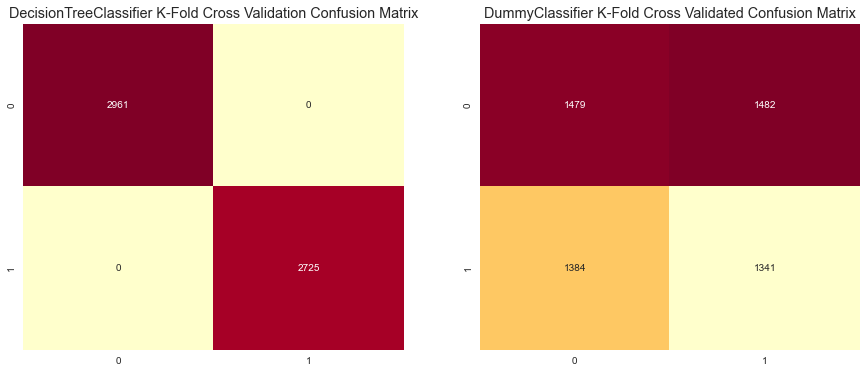

In [32]:
# Cross Validating Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

with plt.style.context('ggplot'):
    # DecisionTreeClassifier
    cart_cm = confusion_matrix(y_train, cross_val_predict(CART, X_train, y_train, cv=5))
    sns.heatmap(cart_cm, annot=True, fmt='', ax=ax1, cbar=False, cmap='YlOrRd')
    ax1.set_title('DecisionTreeClassifier K-Fold Cross Validation Confusion Matrix')
    # Baseline
    stupid_cm = confusion_matrix(y_train, cross_val_predict(stupid, X_train, y_train, cv=5))
    sns.heatmap(stupid_cm, annot=True, fmt='', ax=ax2, cbar=False, cmap='YlOrRd')
    ax2.set_title('DummyClassifier K-Fold Cross Validated Confusion Matrix')


**Observation**
- DecisionTreeClassifier is performing very well with k-fold cross validation, with no false predictions
- we can see the predictions made by the baseline are all over the place

### Learning Curve

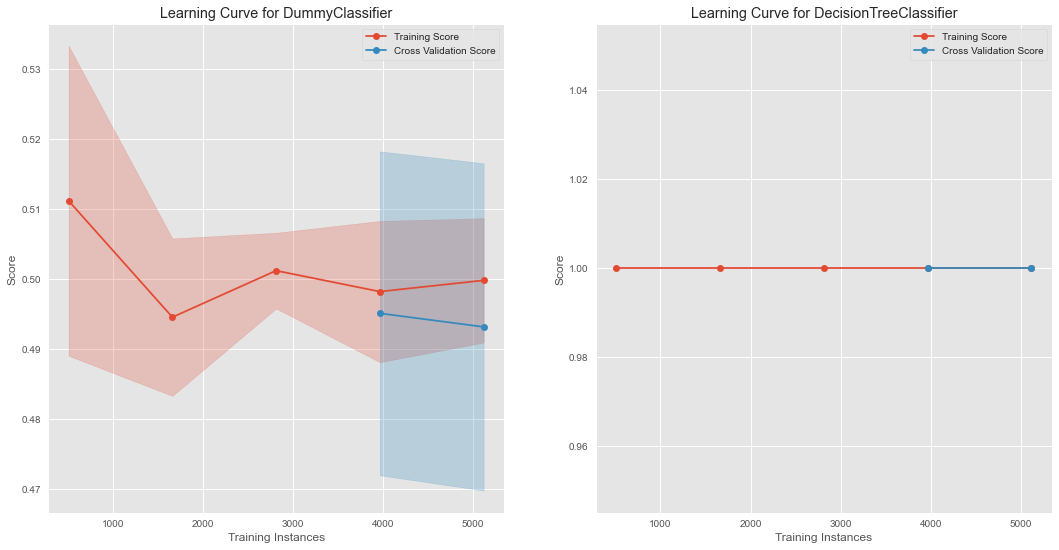

In [33]:
import warnings
warnings.filterwarnings('ignore')

with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    
    # Plotting out Confusion Matrix - DummyClassifier
    stupid_lc = LearningCurve(stupid, ax=ax1, fontsize=12, cv=10, n_jobs=4)
    stupid_lc.fit(X_train, y_train)
    stupid_lc.finalize()

    # Plotting out Confusion Matrix - DecisionTree
    cart_lc = LearningCurve(CART, ax=ax2, fontsize=12, cv=10, n_jobs=4)
    cart_lc.fit(X_train, y_train)
    cart_lc.finalize()

    plt.show()

**Observations**

- DummyClassifier has a very low accuracy at it's training score, indicating the model is severely underfitting
- DecisionTreeClassifier has a perfect fit, absolutely no bias and no variance in the model.

### Generating predictions

we want to see how the model fair against unseen data

In [48]:
pred = CART.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



1.0 accuracy, indicates that the model is doing very well for mushrooms predictions

---

<a class="anchor" id="6"></a>   
## Hyperparameter Tuning and Evaluation - DecisionTreeClassifier

![tree](.\assets\img\tree_strucutre.jpg)

Source: [https://www.datacamp.com/community/tutorials/decision-tree-classification-python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

Did you try to tune the hyper parameters of the learning algorithm, and in that case how?

I am going to use GridSearchCV to run through the parameters to get the model with the best F1-score (binary classes). Since we are using DecisionTreeClassifier, I will be listing down the parameters that I will be tuning.

- criterion - measure the quality of the split
- max\_depth - maximum depth of the tree, basically how big can the tree grow
- max\_leaf\_nodes - stopping criteria for number of leaves

QNA

- Why not I set `None` for max\_depth? Reason being I might risk the model overfitting when the model meets unseen data if I set to `None`.
- Why do I still want to do Hyperparameter Tuning even though my model has a very high accuracy? I want to find the most optimal parameters without making my model too complex, since Decision Trees has a tendency to overfit.

Source: [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [35]:
list(DecisionTreeClassifier().get_params().keys())

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

### GridSearchCV

Since the dataset is relatively small and this is a two class classification prediction task, we can afford to use GridSearchCV to perform an exhaustive search for the best hyperparameters.

In [36]:
filterwarnings('ignore')
# Create the parameter grid
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 15),
    'max_leaf_nodes': np.arange(10, 16)
}
# Creating a model based on the pipeline
grid_search = Pipeline(
    steps=[
        ('SimpleImputer', imp),
        ("OneHotEncoder", onehot),
        ("GridSearchCV", GridSearchCV(
            DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1),
            params_grid,
            cv=5,
            verbose=2,
            n_jobs=4,
            scoring='accuracy'
            )
        )
    ]
)
# Fitting Model
grid_search.fit(X_train, y_train)
print(grid_search.named_steps['GridSearchCV'].best_estimator_)
print(grid_search.named_steps['GridSearchCV'].best_params_)
print(grid_search.named_steps['GridSearchCV'].best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15)
{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 15}
1.0


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=14)

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 14}

cross validation mean accuracy: 1.0

### Initiate model with Hyperparameters

Now, I am going to initiate the resultant model based on the best estimator from hyperparameter tuning.

In [37]:

# Creating a model based on the pipeline
model_tuned = Pipeline(
    steps=[
        ('SimpleImputer', imp),
        ('OneHotEncoder', onehot),
        ("DecisionTreeClassifier", grid_search.named_steps['GridSearchCV'].best_estimator_)
    ]
)
# Fitting Model
model_tuned.fit(X_train, y_train)
# Creating predictions
pred = model_tuned.predict(X_test)
print(classification_report(y_test, pred, digits=3))
# Cross Validation
scores = cross_val_score(model_tuned, X_train, y_train, cv=10)
print('Cross Validation Scores: {}'.format(scores))
print('Mean Cross Validation Scores: {}'.format(scores.mean()))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1247
           1      1.000     1.000     1.000      1191

    accuracy                          1.000      2438
   macro avg      1.000     1.000     1.000      2438
weighted avg      1.000     1.000     1.000      2438

Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Cross Validation Scores: 1.0


** Observations **
- 100% accuracy in predictions
- 100% accuracy in cross validation

### Validation Curve



Validation curves visualizes the performace metrics over a range of values for a hyperparameters

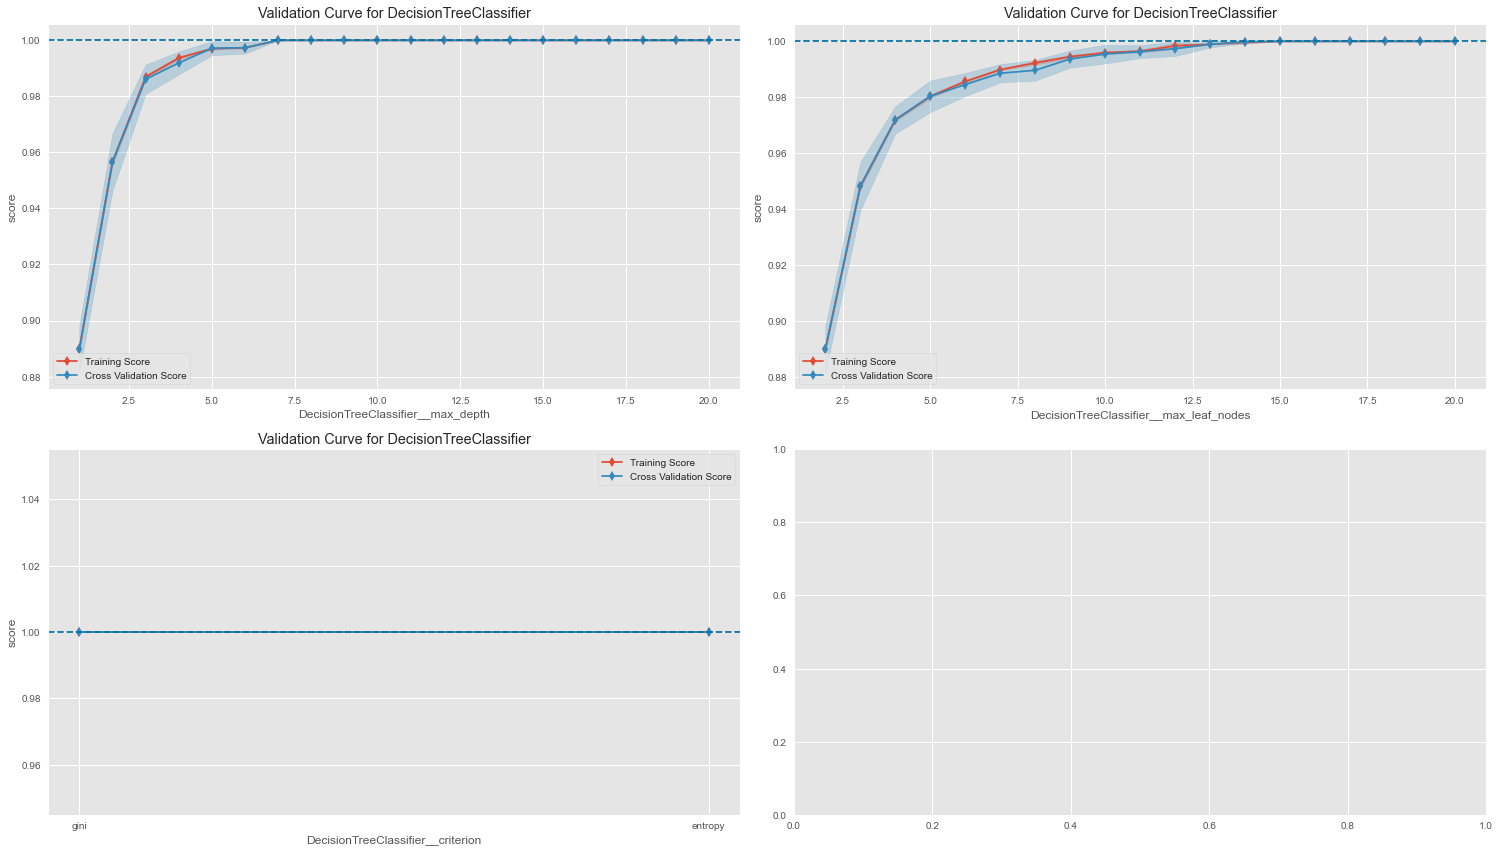

In [38]:
# validating curve
with plt.style.context('ggplot'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(21, 12), tight_layout=True)
    # max depth
    max_d = ValidationCurve(model_tuned, 'DecisionTreeClassifier__max_depth', np.arange(1, 21), cv=10, n_jobs=4, ax=ax1)
    max_d.fit(X_train, y_train)
    max_d.finalize()
    # max_leaf_nodes
    max_l = ValidationCurve(model_tuned, 'DecisionTreeClassifier__max_leaf_nodes', np.arange(1, 21), cv=10, n_jobs=4, ax=ax2)
    max_l.fit(X_train, y_train)
    max_l.finalize()
    # criterion
    criteria = ValidationCurve(model_tuned, 'DecisionTreeClassifier__criterion', ['gini', "entropy"], cv=10, n_jobs=4, ax=ax3)
    criteria.fit(X_train, y_train)
    criteria.finalize()
    # vertical lines
    ax1.axhline(y=1, linestyle='--')
    ax2.axhline(y=1, linestyle='--')
    ax3.axhline(y=1, linestyle='--')
    ax4.axhline(y=1, linestyle='--')

plt.show()

**Observations** 

training score matches the cross validation score for all curves  

- the parameters reached 1.0 accuracy and is consistent thereafter, as such there is indication that the hyperparameters are valid

### Generating Predictions

generating predictions using `X_test` and comparing with the ground truth

100% accuracy, indication points out that the model fair well against unseen data.

### Confusion Matrix and Receiving Operating Characteristics Curve

Receiving Operating Characteristics Curve: shows the true positive and false positive rate for every probability threshold of a binary classifier

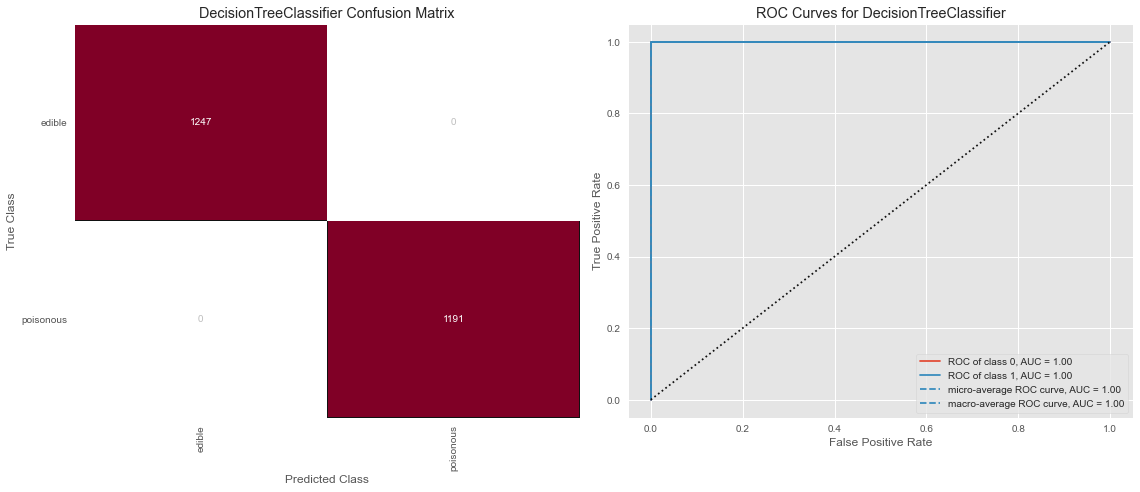

In [47]:
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), tight_layout=True)
    # Confusion Metrics
    cm_t = ConfusionMatrix(model_tuned, ax=ax1, classes=label_encoder.classes_)
    cm_t.fit(X_train, y_train)
    cm_t.score(X_test, y_test)
    cm_t.finalize()
    # ROC
    roc_t = ROCAUC(model_tuned, ax=ax2)
    roc_t.fit(X_train, y_train)
    roc_t.score(X_test, y_test)
    roc_t.finalize()
    ax2.set_ylim(-0.05, 1.05)
    ax2.set_xlim(-0.05, 1.05)

**Observations**

Can you say anything about the errors that the system makes?

- the confusion matrix shows that the model makes no false predictions, false positive and false negative
- roc shows the area under curve to be 1.0, means the model has maximises it true positive rate

### Learning Curve

Learning Curve is used to visualise the effect of the number of observations on the performance metric.

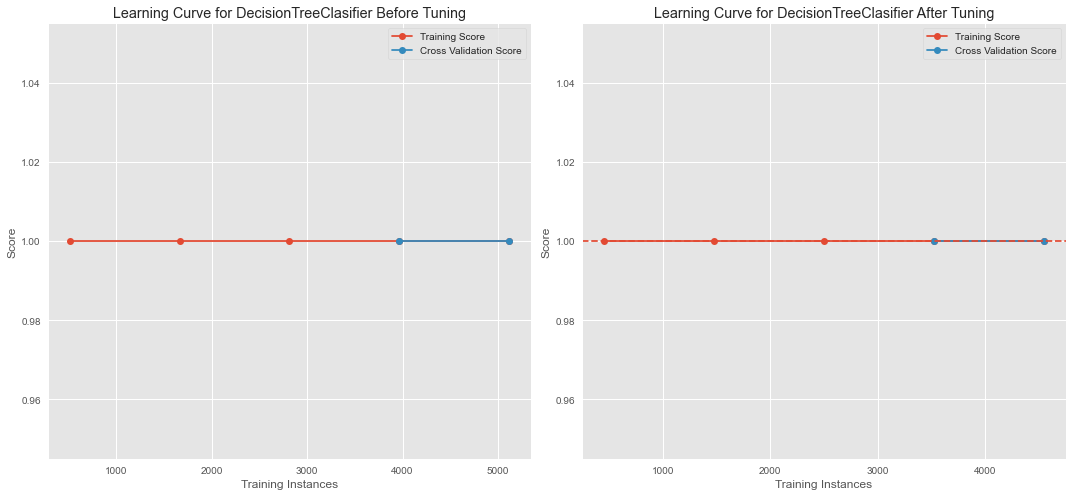

In [41]:
# Plotting out Learning Curve
# Disclaimer: This is not a machine learning library, merely a library to help evaluate machine learning models
filterwarnings('ignore')
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), tight_layout=True)
    # Plotting out Confusion Matrix - DecisionTree
    cart_lc = LearningCurve(CART, fontsize=12, cv=10, n_jobs=3, ax=ax1)
    cart_lc.fit(X_train, y_train)
    cart_lc.finalize()
    ax1.set_title('Learning Curve for DecisionTreeClasifier Before Tuning')

    lc_t = LearningCurve(model_tuned, cv=5, fontsize=12, n_jobs=True, ax=ax2)
    lc_t.fit(X_train, y_train)
    lc_t.finalize()
    ax2.axhline(y=1, linestyle='--')
    ax2.set_title('Learning Curve for DecisionTreeClasifier After Tuning')

    plt.show()

**Observations**

- absolutely no bias and variance in the learning curves
- there is no difference with and without hyperparameter tuning
- both models are good fit

---

## Interpreting the Model - DecisionTreeClassifier

![](./assets/img/dikw.png)

For every business (not sure why would a mushroom business would want to hire a data scientist), we would want to find reasoning/logic behind our data. This will later support us to make relevant insights and widoms to make better business decisions.

In [39]:
pred = model_tuned.predict(X_test)
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



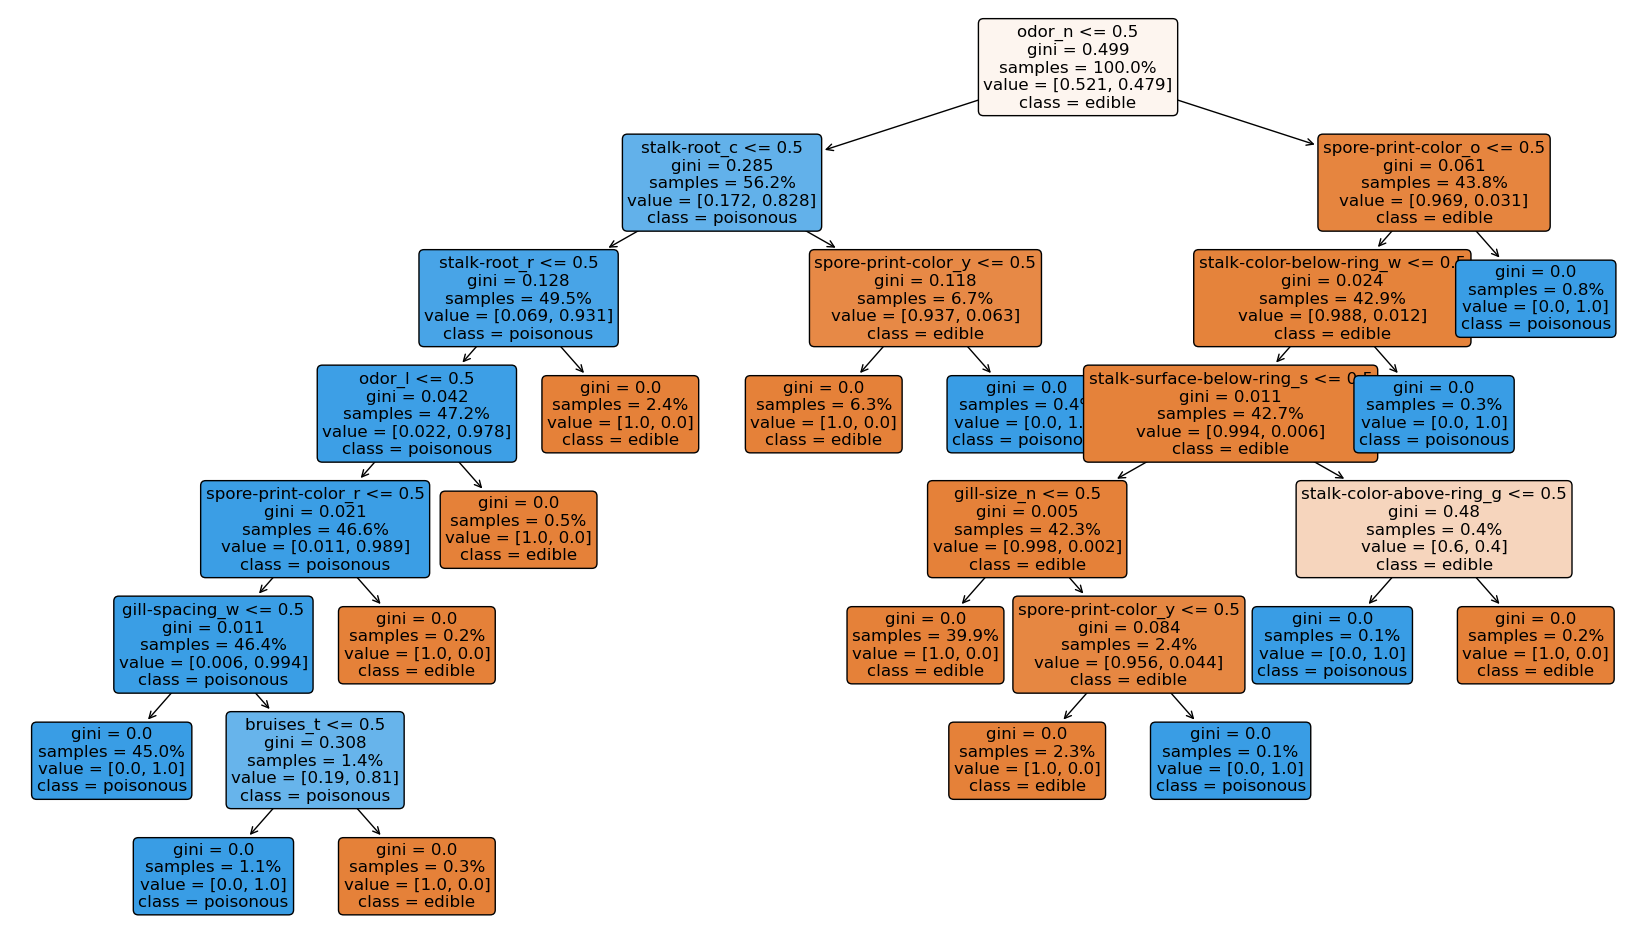

In [42]:
# plotting out decision tree
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(21, 12))
    plot_tree(model_tuned.named_steps['DecisionTreeClassifier'], filled=True, ax=ax, feature_names=X_feature_name, fontsize=12, class_names=label_encoder.classes_, proportion=True, rounded=True)
    plt.show()

**Observations**

- at the root node: odor\_none makes the biggest decision in the tree, if the the there is no odor (odor\_n = 1) the mushroom is likely to be edible, else poisonous

### Feature Importance

Normalized total reduction of criteria by feature (Gini importance)

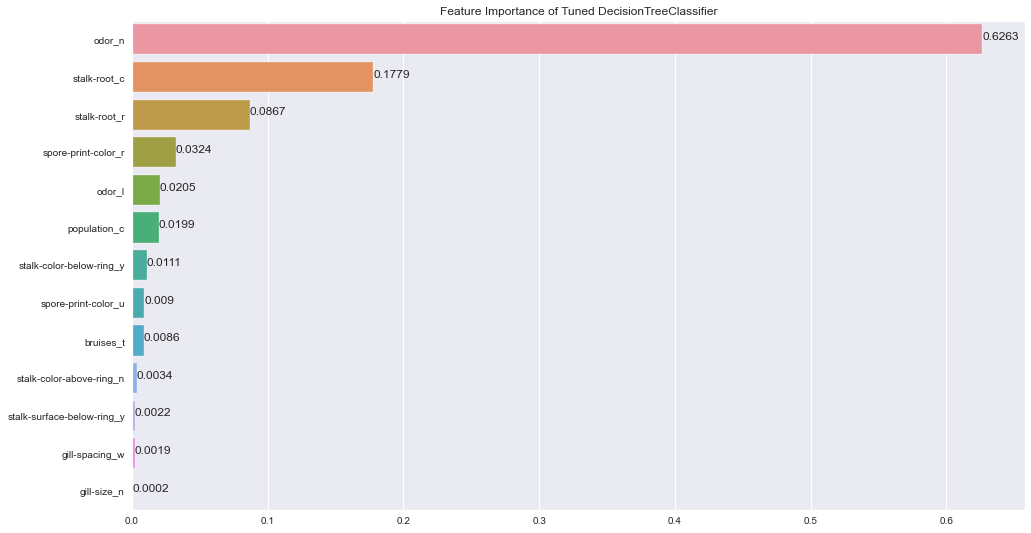

In [43]:
# Creating Feature Importance
importance = pd.Series(model_tuned.named_steps['DecisionTreeClassifier'].feature_importances_, index=model_tuned.named_steps['OneHotEncoder'].get_feature_names(X_train.columns)).sort_values(ascending=False)
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(16, 9))
    sns.barplot(x=importance[importance > 0].values, y=importance[importance > 0].index, ax=ax)
    ax.set_title('Feature Importance of Tuned {}'.format('DecisionTreeClassifier'))
    [ax.text(x=v, y=i, s=round(v, 4)) for i, v in zip(np.arange(0, len(importance)), importance[importance>0].values)]
plt.show()

In [44]:
# listing down significant features
list(importance[importance > 0].index)

['odor_n',
 'stalk-root_c',
 'stalk-root_r',
 'spore-print-color_r',
 'odor_l',
 'population_c',
 'stalk-color-below-ring_y',
 'spore-print-color_u',
 'bruises_t',
 'stalk-color-above-ring_n',
 'stalk-surface-below-ring_y',
 'gill-spacing_w',
 'gill-size_n']

**Observations**

Is it possible to say something about which features the model considers important?

- These features are relevant in determining the edibility of a mushroom
    - 'odor_n',
 'stalk-root_c',
 'stalk-root_r',
 'spore-print-color_r',
 'spore-print-color_u',
 'stalk-surface-above-ring_s',
 'stalk-surface-below-ring_y',
 'odor_l',
 'odor_c',
 'stalk-color-above-ring_n',
 'population_c',
 'gill-spacing_w',
 'gill-size_n'
- Most significant feature in determining a mushroom sample edibility is odor\_n

---

## Exporting Model

In [45]:
import pickle
os.makedirs('./assets/models', exist_ok=True)
with open('./assets/models/mushroom_model.pkl', 'wb') as file:
    pickle.dump(model_tuned, file)

---

## Forenote

I think the most defining factor to checking a mushroom edibility is their odor and their stalk roots. One thing I would improve is perhaps implement better feature selection techniques for practical machine learning and better deployment flexibility. For those who wants to start a mushroom farm, they should consider a mushroom species based on these factors before starting their business venture. Now, I am more likely to survive on an Island filled with only Mushrooms, Lol :P.

![nene](./assets/img/meme.jpg)
> Decision Tree Classifiers literally...

I would like to say I spent almost 5 weeks (Week 1 - Week 5) on Part A of the assignment. The difficulty I found in this prediction task was handling a great number of categorical-nominal data, which made me spent time researching on statistical measures to use. Furthermore, I have learnt more on topics such as Model Selection, Evaluation, and Improvement.